In [1]:
import os

import src.utils.Main
from src.LSTM import BasicLSTM, RCNN_1D_WithConvsInsteadOfPools, RCNN_1D_GAP, RCNN_1D, \
    RCNN_1D_WithConvsInsteadOfPools_WithGAP, RawAudio_RCNN_WithGAP, RawAudio_RCNN, BasicLSTM_1DCNN, BasicLSTM_2DCNN, \
    RCNN_2D, RawAudio_RCNN_WithGAP_WithConvsInsteadOfMaxPools
from src.TrainingAndTesting import Demonstrate, MusicDataLoader, TrainAndTest, Utils

import pandas as pd

import json

In [2]:
from src.utils import Plotting
root_directory = f"{os.getcwd()}"

Please use tensorboard as described
in read me in order to view the models.

I lost all the diagrams I made in the delete and its not worth time.

<h1>Part 1: Raw mel spectogram</h1>


<h3>BASE LSTM:</h3>


testing model: BASIC_LSTM_BestAugmentation
The final training accuracy was:  0.9895833333333334
The final validation accuracy was:  0.7389705882352942


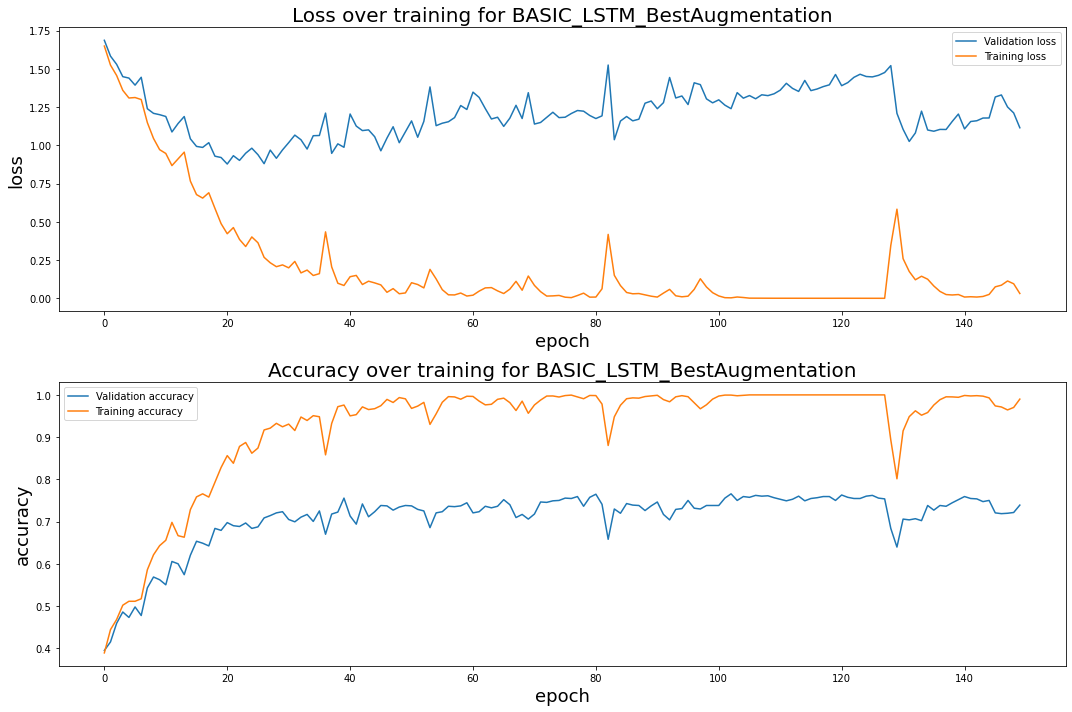

In [3]:
modelName = "BASIC_LSTM_BestAugmentation"

Demonstrate.demonstrateModel(modelName,BasicLSTM, root_directory)


Checking reversed RCNN architecture.

At first, I was not sure what to do. So before I read the paper I tried:
[lstm * a] -> [conv->BN->ReLu(non linear activation)->maxpooling]

<h3>BASIC LSTM 1D-CNN (raw mel spectogram):</h3>

testing model: BASIC_LSTM_1DCNN_BestAugmentation
The final training accuracy was:  0.9592391304347826
The final validation accuracy was:  0.7426470588235294


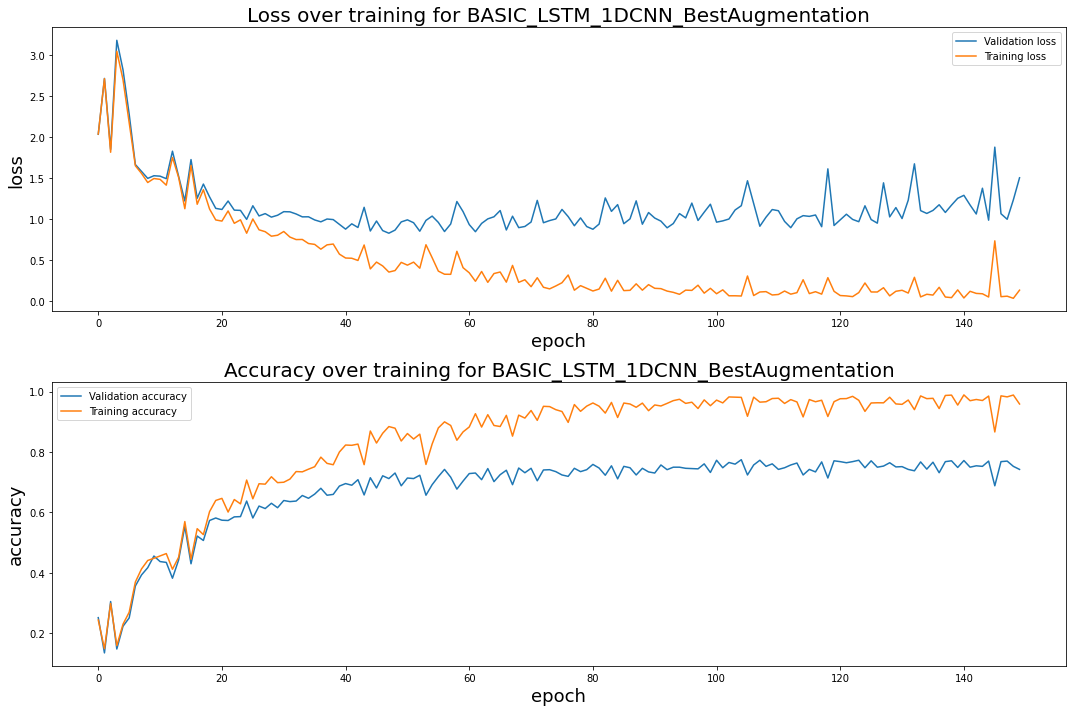

In [4]:
modelName = "BASIC_LSTM_1DCNN_BestAugmentation"

Demonstrate.demonstrateModel(modelName,BasicLSTM_1DCNN, root_directory)


<h3>BASIC LSTM 2D-CNN (raw mel spectogram):</h3>

testing model: BASIC_LSTM_2DCNN_BestAugmentation
The final training accuracy was:  0.10693512304250559
The final validation accuracy was:  0.08468468468468468


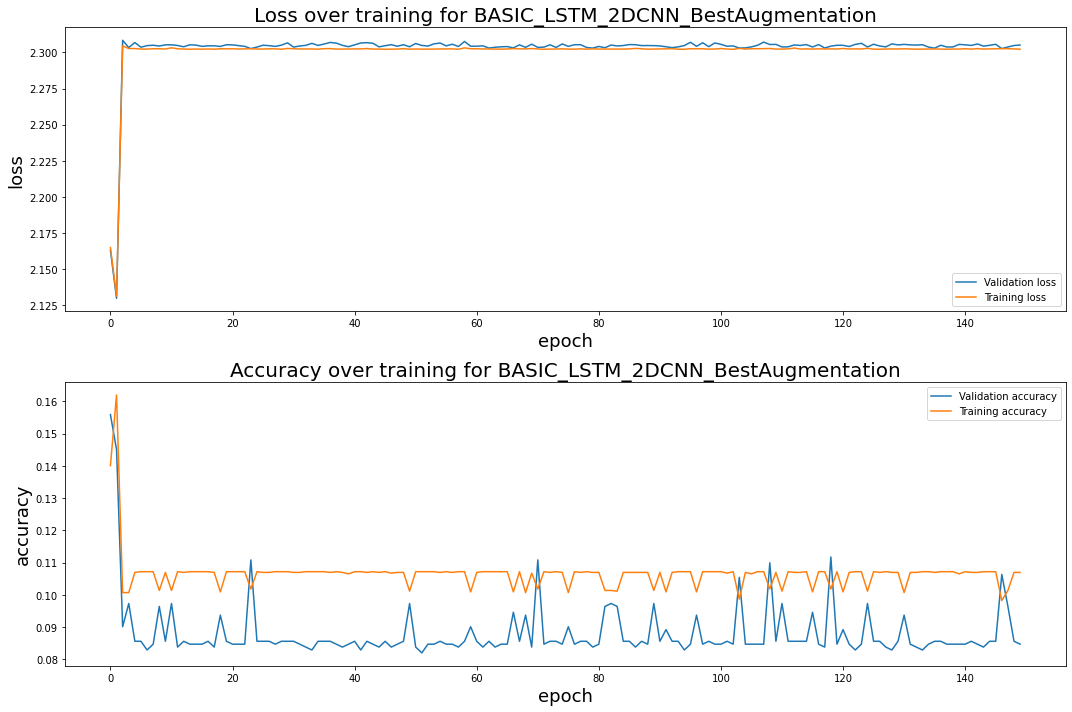

In [5]:
modelName = "BASIC_LSTM_2DCNN_BestAugmentation"

Demonstrate.demonstrateModel(modelName,BasicLSTM_2DCNN, root_directory)


This did not show promise of good fortunes.

So I tried typical architecture followed in RCNN paper for typical RCNN paper:

[conv->BN->ReLu(non linear activation)->maxpooling] -> [lstm * a]

<h3>RCNN 1D (raw mel spectogram) FC:</h3>


testing model: RCNN_1D_BestAugmentation
The final training accuracy was:  0.9959239130434783
The final validation accuracy was:  0.8327205882352942


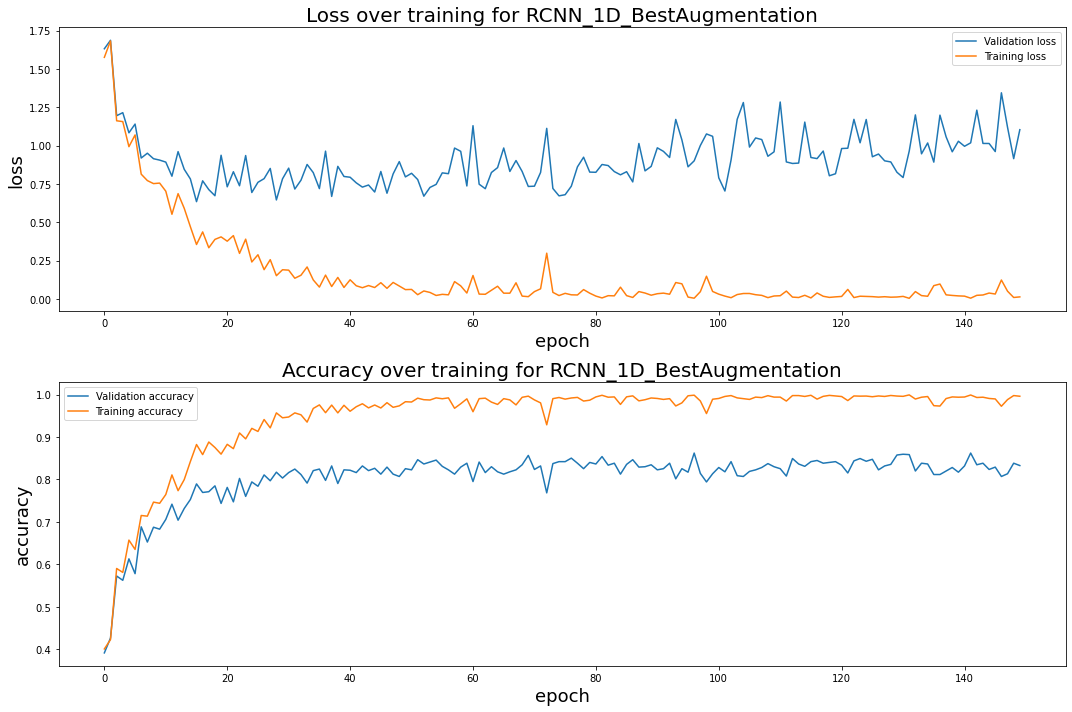

In [6]:
modelName = "RCNN_1D_BestAugmentation"

Demonstrate.demonstrateModel(modelName,RCNN_1D, root_directory)


<h3>RCNN 1D (raw mel spectogram) with GAP(global average pooling)
(also called a MLPCNN):</h3>

testing model: RCNN_1D_Gap
The final training accuracy was:  0.9959239130434783
The final validation accuracy was:  0.8823529411764706


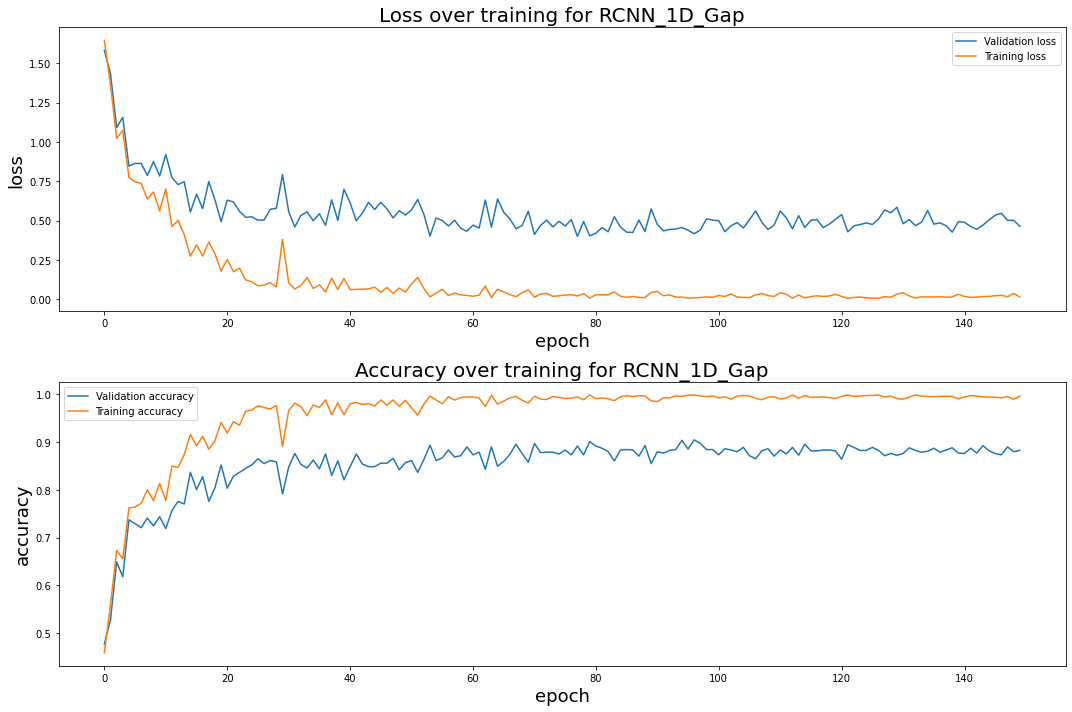

In [7]:
modelName = "RCNN_1D_Gap"

Demonstrate.demonstrateModel(modelName,RCNN_1D_GAP, root_directory)


<h3>RCNN 1D (raw mel spectogram) FC with convs instead of pooling:</h3>

testing model: RCNN_1D_WithConvsInsteadOfPools
The final training accuracy was:  0.9916213768115942
The final validation accuracy was:  0.7509191176470589


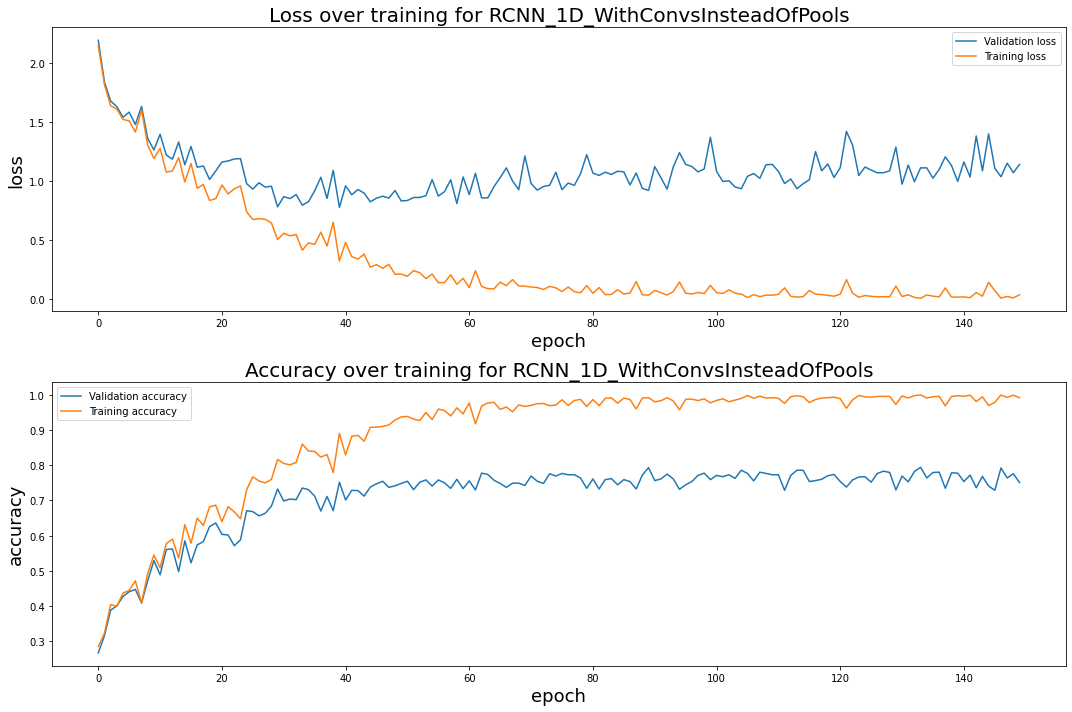

In [8]:
modelName = "RCNN_1D_WithConvsInsteadOfPools"

Demonstrate.demonstrateModel(modelName,RCNN_1D_WithConvsInsteadOfPools, root_directory)


<h3>RCNN 1D (raw mel spectogram) GAP (instead of FC) and with convs instead of pooling:</h3>


testing model: RCNN_1D_WithConvsInsteadOfPools_WithGAP
The final training accuracy was:  0.9642210144927537
The final validation accuracy was:  0.8115808823529411


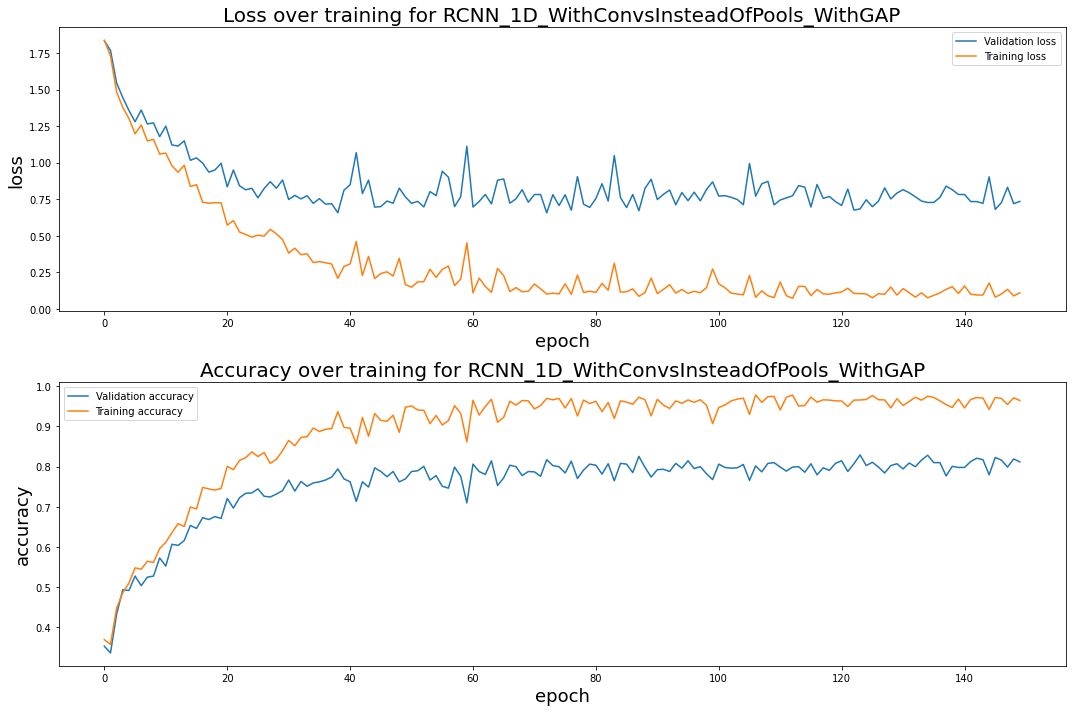

In [14]:
modelName = "RCNN_1D_WithConvsInsteadOfPools_WithGAP"

Demonstrate.demonstrateModel(modelName,RCNN_1D_WithConvsInsteadOfPools_WithGAP, root_directory)


Then I made a RCNN 1D for raw waveform in similar way.

I took my failed 7 layer experiement for CNN1D and attached
2 lstm layers after.

<h3>RCNN 1D (raw waveform) with FC:</h3>

testing model: RCNN_1D_RawAudio
The final training accuracy was:  0.10139484978540772
The final validation accuracy was:  0.08979885057471264


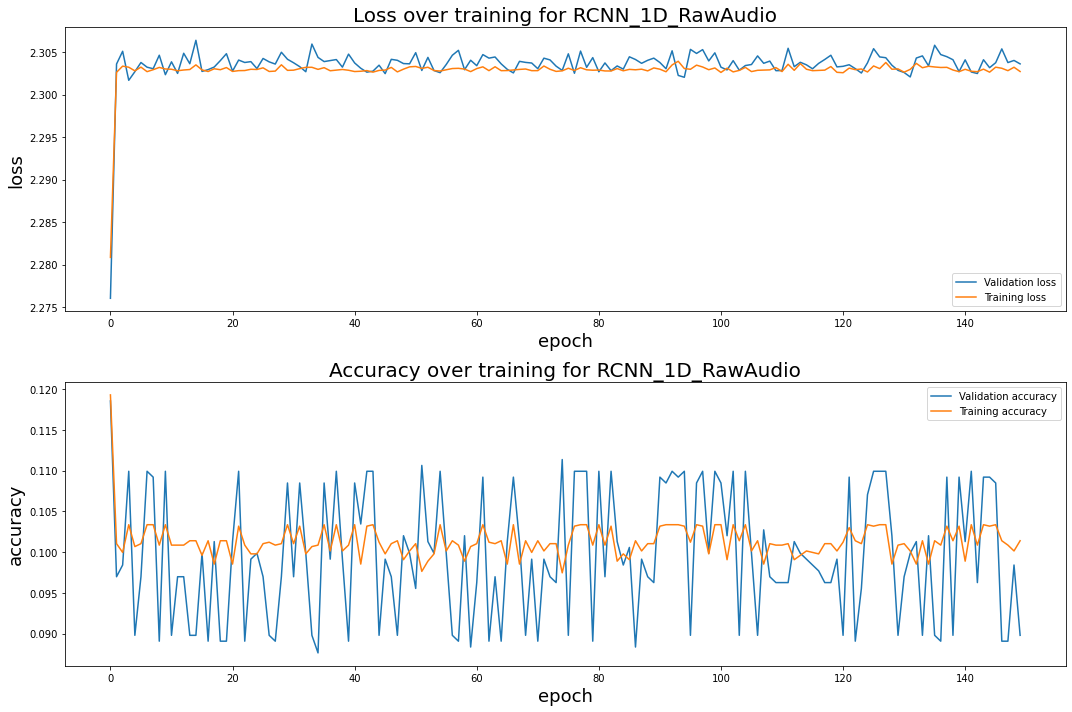

In [10]:
modelName = "RCNN_1D_RawAudio"

Demonstrate.demonstrateModel(modelName,RawAudio_RCNN, root_directory)


<h3>RCNN 1D (raw waveform) with GAP replacing FC's:</h3>

testing model: RCNN_1D_RawAudio_WithGAP
The final training accuracy was:  0.5829756795422032
The final validation accuracy was:  0.45330459770114945


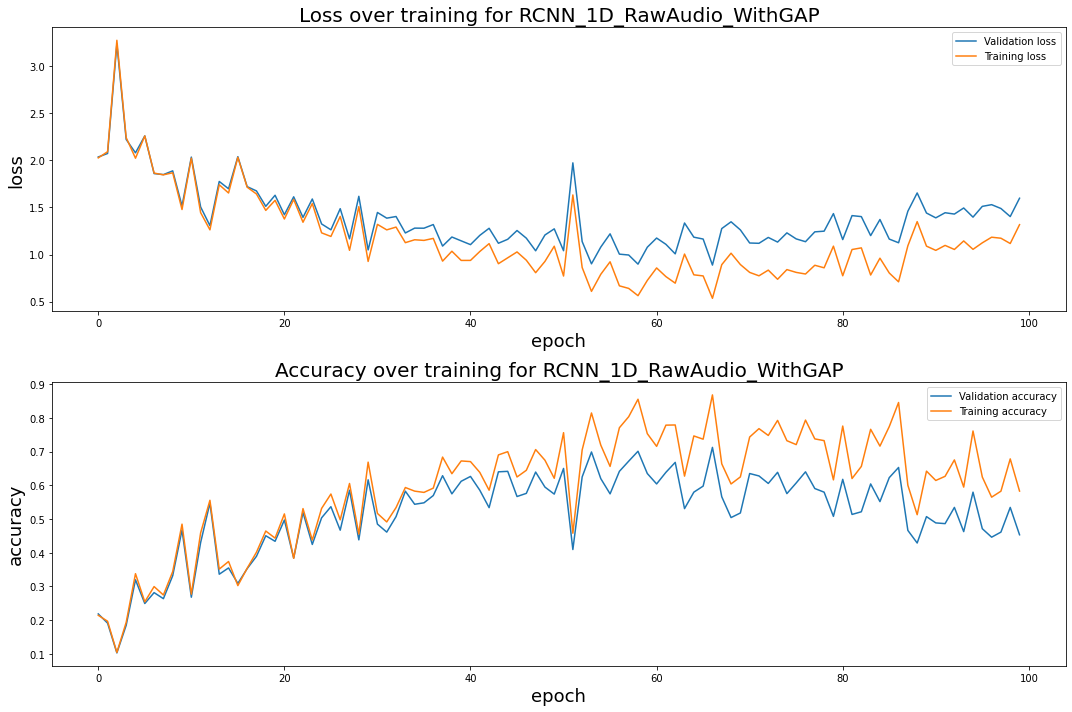

In [11]:
modelName = "RCNN_1D_RawAudio_WithGAP"

Demonstrate.demonstrateModel(modelName,RawAudio_RCNN_WithGAP, root_directory)


Then arrived me at this completed model for raw audio:

From last model, I just swaped some front and back pooling layers with layers
convs layers (with striding) instead.

<h3>1D ACN RCNN</h3>


In [12]:
modelName = "RCNN_1D_RawAudio_WithGAP_WithConvsInsteadOfMaxPools"

Demonstrate.demonstrateModel(modelName,
                             RawAudio_RCNN_WithGAP_WithConvsInsteadOfMaxPools,
                             root_directory)


testing model: RCNN_1D_RawAudio_WithGAP_WithConvsInsteadOfMaxPools


FileNotFoundError: [Errno 2] No such file or directory: '/home/empeor/work/COLLEGE/term_2/deep_learning/project/FerdiasDLProject/polishedProject/src/LSTM/logs/RCNN_1D_RawAudio_WithGAP_WithConvsInsteadOfMaxPools.json'

I also experimented a little bit with 2D RCNN
(using raw mel spectogram)

<h3>RCNN 2D (raw mel spectogram):</h3>

testing model: RCNN_2D_BestAugmentation
The final training accuracy was:  0.4539149888143177
The final validation accuracy was:  0.4117117117117117


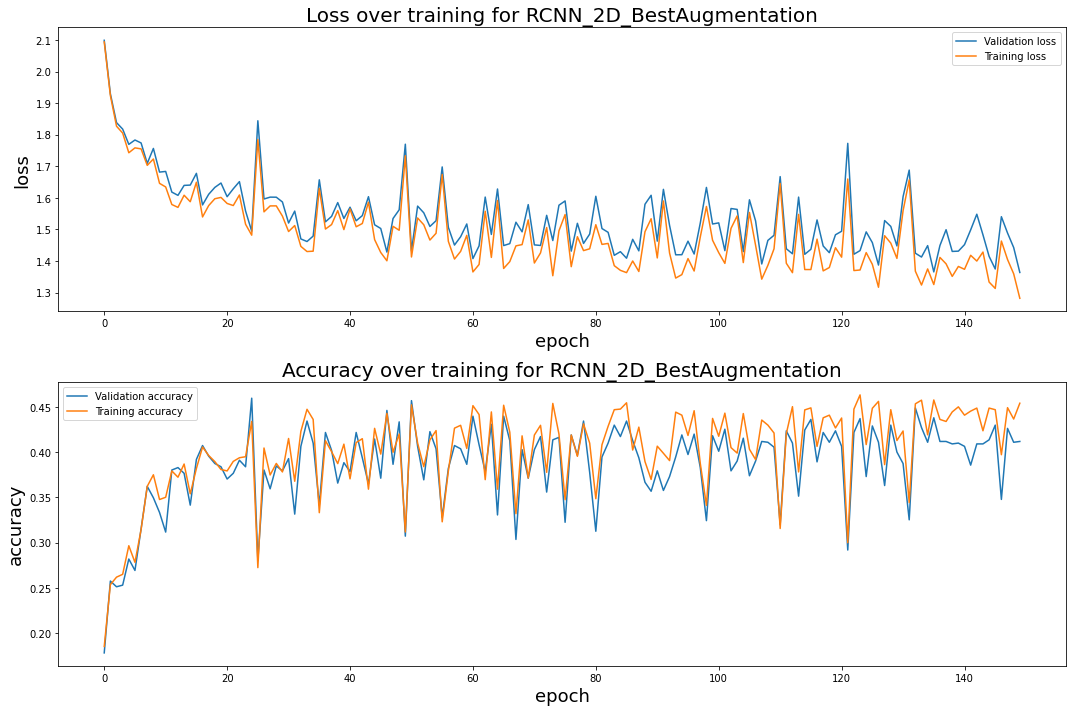

In [13]:
modelName = "RCNN_2D_BestAugmentation"

Demonstrate.demonstrateModel(modelName,RCNN_2D, root_directory)